In [2]:
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install statsmodels

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

In [4]:
df = pd.read_csv("tabel_final.csv")
df.head()

,idSchool,Anul Scolar,Numele Scolii,Tipul Scolii,Programul Scolii,Forma de proprietate,Judetul,Localitatea,email,numele_scolii,tipul_clasei,numar_calculatoare,numar_locuri,anul_achizitiei,Media
0,11268140,Anul şcolar 2018-2019,CENTRUL SCOLAR DE EDUCATIE INCLUZIVA NR 2 SIBIU,Unitate de învățământ,Două schimburi/zi,Publică de interes naţional şi local,SIBIU,SIBIU,csei2sibiu@gmail.ro,CENTRUL SCOLAR DE EDUCATIE INCLUZIVA NR.2 SIBIU,Laborator informatic,13.0,9,2008,3.22
1,11268140,Anul şcolar 2018-2019,CENTRUL SCOLAR DE EDUCATIE INCLUZIVA NR 2 SIBIU,Unitate de învățământ,Două schimburi/zi,Publică de interes naţional şi local,SIBIU,SIBIU,csei2sibiu@gmail.ro,CENTRUL SCOLAR DE EDUCATIE INCLUZIVA NR.2 SIBIU,Laborator informatic,13.0,7,2008,3.22
2,11268140,Anul şcolar 2018-2019,CENTRUL SCOLAR DE EDUCATIE INCLUZIVA NR 2 SIBIU,Unitate de învățământ,Două schimburi/zi,Publică de interes naţional şi local,SIBIU,SIBIU,csei2sibiu@gmail.ro,CENTRUL SCOLAR DE EDUCATIE INCLUZIVA NR.2 SIBIU,Laborator informatic,13.0,9,2000,3.22
3,11268938,Anul şcolar 2018-2019,"CENTRUL SCOLAR PENTRU EDUCATIE INCLUZIVA ""ELEN...",Unitate de învățământ,Două schimburi/zi,Publică de interes naţional şi local,VRANCEA,FOCŞANI,csielenadoamna@yahoo.com,SCOALA CORP A,Laborator informatic,25.0,2,2007,5.17
4,11268938,Anul şcolar 2018-2019,"CENTRUL SCOLAR PENTRU EDUCATIE INCLUZIVA ""ELEN...",Unitate de învățământ,Două schimburi/zi,Publică de interes naţional şi local,VRANCEA,FOCŞANI,csielenadoamna@yahoo.com,SCOALA CORP C,Laborator informatic,20.0,2,2007,5.17


In [5]:
df.describe()

,idSchool,numar_calculatoare,numar_locuri,anul_achizitiei
count,2.946000e+03,2942.000000,2946.000000,2946.000000
mean,1.126577e+07,18.471448,15.650373,2010.264426
std,5.277059e+03,8.049175,5.295925,4.169540
min,1.125043e+07,0.000000,1.000000,1986.000000
25%,1.126094e+07,11.000000,16.000000,2007.000000
50%,1.126572e+07,18.000000,17.000000,2009.000000
75%,1.126989e+07,25.000000,17.000000,2014.000000
max,1.127586e+07,78.000000,89.000000,2023.000000


### Stergerea "-" din coloana "Media"

In [6]:
df = df[df["Media"].str.contains("-") == False]

### Convertirea coloanelor din str in int

In [7]:
df['numar_locuri'] = df['numar_locuri'].astype(float)
df['Media'] = df['Media'].astype(float)
df['numar_calculatoare'] = df['numar_calculatoare'].astype(float)
df['idSchool'] = df['idSchool'].astype(float)
df['anul_achizitiei'] = df['anul_achizitiei'].astype(float)

### Statistici Descriptive

In [8]:
def descriptive_statistics(df, var):
    # Calculate mean, median, mode    
    median_val = df[var].median()    
    mode_val = df[var].mode()[0]  # mode() returns a Series, we take the first element        
    # Drop missing values    
    df_no_missing = df.dropna(subset=[var])        
    # Calculate skewness and kurtosis    
    asymmetry = skew(df_no_missing[var])    
    kurt = kurtosis(df_no_missing[var])        
    # Test normality using the Shapiro-Wilk test    
    stat_shapiro, p_value_shapiro = shapiro(df_no_missing[var])        
    print(f'Descriptive statistics for {var}:')        
    # Return a dictionary with the results  
    return {        
        'median': median_val,        
        'mode': mode_val,        
        'skewness': asymmetry,        
        'kurtosis': kurt,        
        'shapiro_stat': stat_shapiro,        
        'shapiro_p_value': p_value_shapiro    
    }

In [9]:
descriptive_statistics(df, 'numar_locuri')

Descriptive statistics for numar_locuri:


{'median': 17.0,
 'mode': 17.0,
 'skewness': 2.173222947673763,
 'kurtosis': 33.68517156975994,
 'shapiro_stat': 0.5707069635391235,
 'shapiro_p_value': 0.0}

In [10]:
descriptive_statistics(df, 'Media')

Descriptive statistics for Media:


{'median': 6.04,
 'mode': 8.06,
 'skewness': 0.11832514539946709,
 'kurtosis': 0.43136898362009557,
 'shapiro_stat': 0.9926052689552307,
 'shapiro_p_value': 4.0502063508585096e-11}

In [11]:
descriptive_statistics(df, 'numar_calculatoare')

Descriptive statistics for numar_calculatoare:


{'median': 18.0,
 'mode': 10.0,
 'skewness': 1.5218581983564547,
 'kurtosis': 9.079609259434338,
 'shapiro_stat': 0.8776376247406006,
 'shapiro_p_value': 3.29305139116332e-43}

In [12]:
descriptive_statistics(df, 'anul_achizitiei')

Descriptive statistics for anul_achizitiei:


{'median': 2009.0,
 'mode': 2008.0,
 'skewness': -0.26622661663530034,
 'kurtosis': 1.4981572005324688,
 'shapiro_stat': 0.9155056476593018,
 'shapiro_p_value': 1.0580524233582418e-37}

### Vizualizari a distributiei variabilelor

Text(0, 0.5, 'Frecvență')

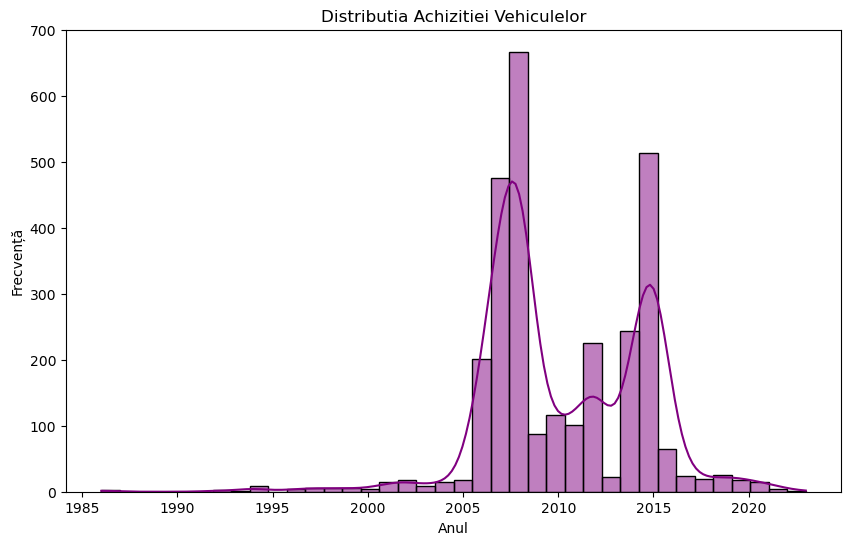

In [20]:
var = "anul_achizitiei"
# Desenați histograma pentru distribuția datelor
plt.figure(figsize=(10, 6))
sns.histplot(df[var], kde=True, color='purple')
plt.title('Distributia Achizitiei Vehiculelor')
plt.xlabel('Anul')
plt.ylabel('Frecvență')

Text(0, 0.5, 'Frecvență')

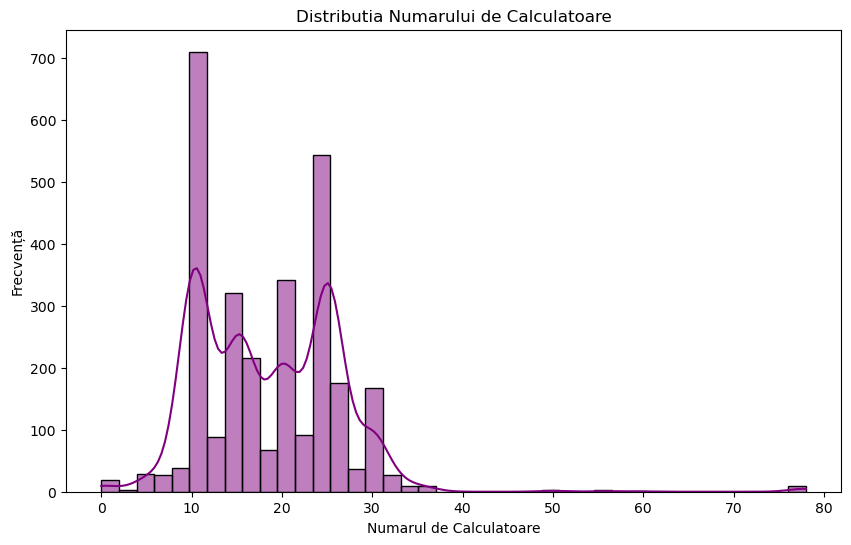

In [23]:
var = 'numar_calculatoare'
# Desenați histograma pentru distribuția datelor
plt.figure(figsize=(10, 6))
sns.histplot(df[var], kde=True, color='purple')
plt.title('Distributia Numarului de Calculatoare')
plt.xlabel('Numarul de Calculatoare')
plt.ylabel('Frecvență')

Text(0, 0.5, 'Frecvență')

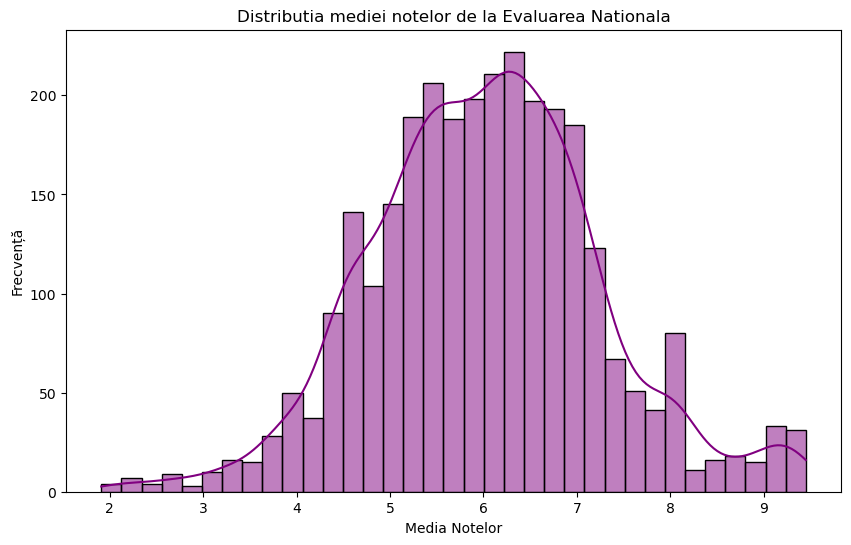

In [27]:
var = 'Media'
# Desenați histograma pentru distribuția datelor
plt.figure(figsize=(10, 6))
sns.histplot(df[var], kde=True, color='purple')
plt.title('Distributia mediei notelor de la Evaluarea Nationala')
plt.xlabel('Media Notelor')
plt.ylabel('Frecvență')

### Calculul coeficientului de corelație Pearson

In [13]:
# Selectarea unei perechi de variabile pentru analiza corelației

var1 = 'numar_locuri'
var2 = 'Media'

# Calculul coeficientului de corelație Pearson
correlation_coefficient = df[var1].corr(df[var2])

print(f'Coeficientul de corelație între {var1} și {var2}: {correlation_coefficient}')

Coeficientul de corelație între numar_locuri și Media: -0.2640763476089988


#### Observam existenta unei corelatii slabe si negative intre numarul de locuri si performanta elevilor. Acest lucru indica faptul ca confortul datorat transportului nu are o legatura foarte puternica cu performanta elevilor

In [14]:
# Selectarea unei perechi de variabile pentru analiza corelației

var1 = 'numar_calculatoare'
var2 = 'Media'

# Calculul coeficientului de corelație Pearson
correlation_coefficient = df[var1].corr(df[var2])

print(f'Coeficientul de corelație între {var1} și {var2}: {correlation_coefficient}')

Coeficientul de corelație între numar_calculatoare și Media: 0.21020788037040572


#### Observam existenta unei corelatii slabe si pozitive intre numarul de calculatoare si performanta elevilor.

In [15]:
# Selectarea unei perechi de variabile pentru analiza corelației

var1 = 'anul_achizitiei'
var2 = 'Media'

# Calculul coeficientului de corelație Pearson
correlation_coefficient = df[var1].corr(df[var2])

print(f'Coeficientul de corelație între {var1} și {var2}: {correlation_coefficient}')

Coeficientul de corelație între anul_achizitiei și Media: -0.04700061278967884


#### Observam faptul ca nu exista nicio corelatie puternica intre anul achizitiei vehiculelor si performanta elevilor.

In [16]:
df.columns

Index(['idSchool', 'Anul Scolar', 'Numele Scolii', 'Tipul Scolii',
       'Programul Scolii', 'Forma de proprietate', 'Judetul', 'Localitatea',
       'email', 'numele_scolii', 'tipul_clasei', 'numar_calculatoare',
       'numar_locuri', 'anul_achizitiei', 'Media'],
      dtype='object')

### Pair Plot

C:\Users\andre\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


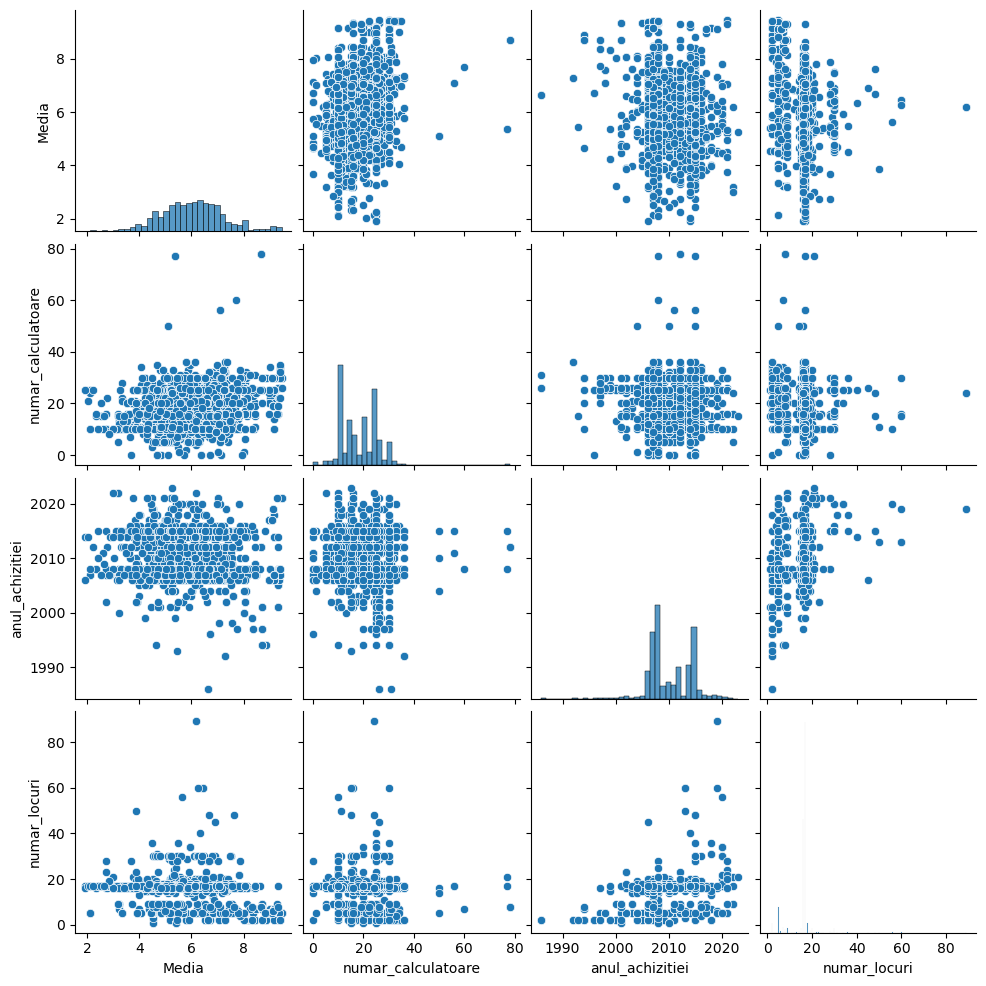

In [17]:
df_section = df[['Media', 'numar_calculatoare', 'anul_achizitiei', 'numar_locuri']]
sns.pairplot(df_section)

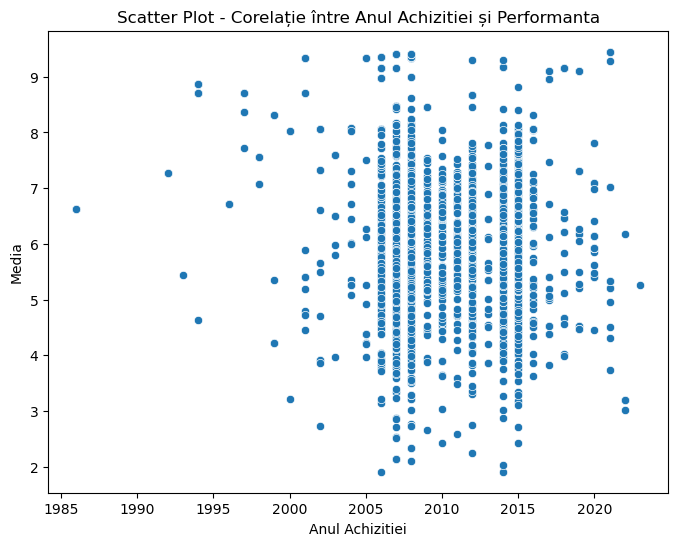

In [18]:
# Variații ale datelor
var1 = 'anul_achizitiei'
var2 = 'Media'

# Creare scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=var1, y=var2)
plt.title('Scatter Plot - Corelație între Anul Achizitiei și Performanta')
plt.xlabel('Anul Achizitiei')
plt.ylabel('Media')
plt.show()

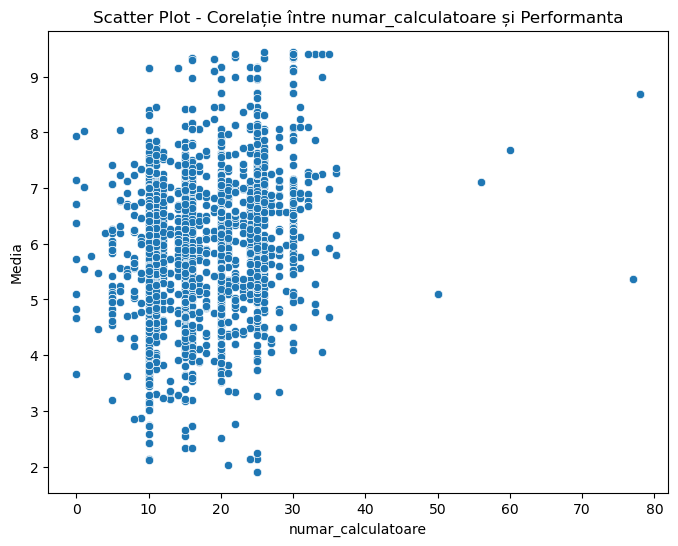

In [19]:
var1 = 'numar_calculatoare'
var2 = 'Media'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=var1, y=var2)
plt.title('Scatter Plot - Corelație între numar_calculatoare și Performanta')
plt.xlabel('numar_calculatoare')
plt.ylabel('Media')
plt.show()

###  Gruparea dupa judete

In [109]:
aggregations = {
                'numar_locuri':'sum',
                'anul_achizitiei':'mean',
               'numar_calculatoare':'count',
               'Media': 'mean',
               'idSchool': 'count'}

df_jud = df.groupby(['Judetul']).agg(aggregations).reset_index()
df_jud.head()

,Judetul,numar_locuri,anul_achizitiei,numar_calculatoare,Media,idSchool
0,ALBA,1856.0,2010.221311,120,6.648607,122
1,ARAD,1010.0,2009.169231,65,6.016923,65
2,ARGEŞ,1268.0,2010.722892,83,5.815301,83
3,BACĂU,1516.0,2010.181818,99,6.203737,99
4,BIHOR,1216.0,2009.082353,85,6.132118,85


In [110]:
top_10_jud = df_jud.nlargest(10,'Media')
top_10_jud

,Judetul,numar_locuri,anul_achizitiei,numar_calculatoare,Media,idSchool
27,MUNICIPIUL BUCUREŞTI,131.0,2015.263158,19,8.745789,19
0,ALBA,1856.0,2010.221311,120,6.648607,122
8,BRĂILA,419.0,2008.962963,27,6.502593,27
34,SUCEAVA,925.0,2009.416667,60,6.501667,60
29,NEAMŢ,2185.0,2011.437500,160,6.466563,160
41,VÂLCEA,1030.0,2009.369231,65,6.433538,65
11,CLUJ,1929.0,2011.069565,115,6.423652,115
23,IAŞI,2155.0,2010.300000,139,6.361857,140
30,OLT,1372.0,2010.383721,86,6.329651,86
21,HUNEDOARA,1709.0,2010.000000,112,6.315752,113


In [111]:
top_10_jud = df_jud.nlargest(10,'numar_calculatoare')
top_10_jud

,Judetul,numar_locuri,anul_achizitiei,numar_calculatoare,Media,idSchool
29,NEAMŢ,2185.0,2011.437500,160,6.466563,160
23,IAŞI,2155.0,2010.300000,139,6.361857,140
0,ALBA,1856.0,2010.221311,120,6.648607,122
11,CLUJ,1929.0,2011.069565,115,6.423652,115
21,HUNEDOARA,1709.0,2010.000000,112,6.315752,113
15,DOLJ,1184.0,2009.540000,100,5.115300,100
19,GORJ,1651.0,2010.630000,100,5.970500,100
3,BACĂU,1516.0,2010.181818,99,6.203737,99
9,BUZĂU,1446.0,2011.931818,88,5.931705,88
30,OLT,1372.0,2010.383721,86,6.329651,86


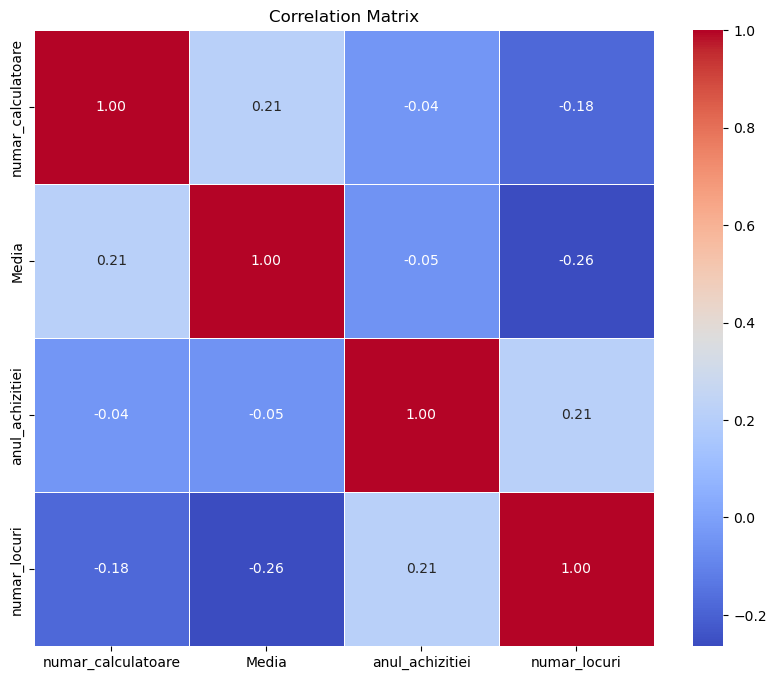

In [30]:
variables_of_interest = ['numar_calculatoare', 'Media', 'anul_achizitiei', 'numar_locuri']
subset_df = df[variables_of_interest]

correlation_matrix = subset_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [31]:
# O usoara corelație pozitivă între 'Media' și 'numar_calculatoare' poate sugera că școlile cu un număr mai mare de calculatoare au, în medie, rezultate mai bune. 
# O usoara corelație între 'numar_locuri' și 'anul_achizitiei' sugerează că numărul de locuri poate varia în funcție de anul achiziției. 

### Scatter Plot

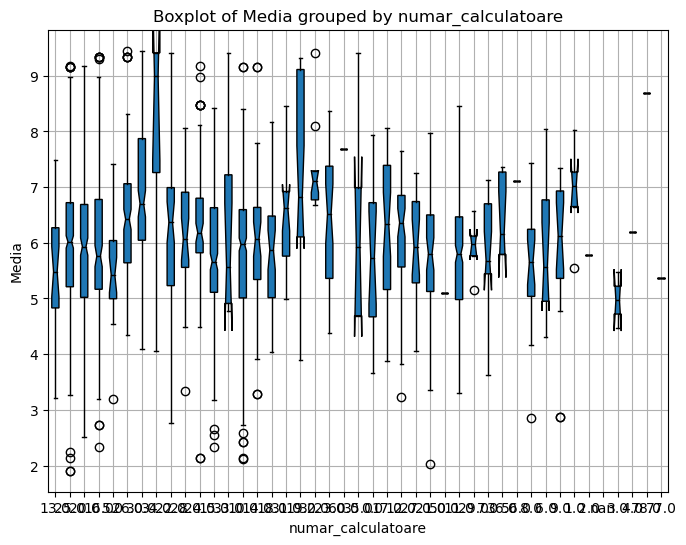

In [32]:
var1 = 'numar_calculatoare'
var2 = 'Media'

plt.figure(figsize=(8, 6))
plt.boxplot([df[var2][df[var1] == value] for value in df[var1].unique()],
            labels=df[var1].unique(),
            notch=True,
            vert=True,
            patch_artist=True,
            medianprops={'color': 'black'})

plt.xlabel(var1)
plt.ylabel(var2)
plt.title(f'Boxplot of {var2} grouped by {var1}')
plt.grid(True)
plt.show()

In [33]:
#Asemanator cu headmapul facut anterior, putem corelație relativ pozitivă între 'Media' și 'numar_calculatoare' între 'numar_locuri' și 'anul_achizitiei'

### Box Plot

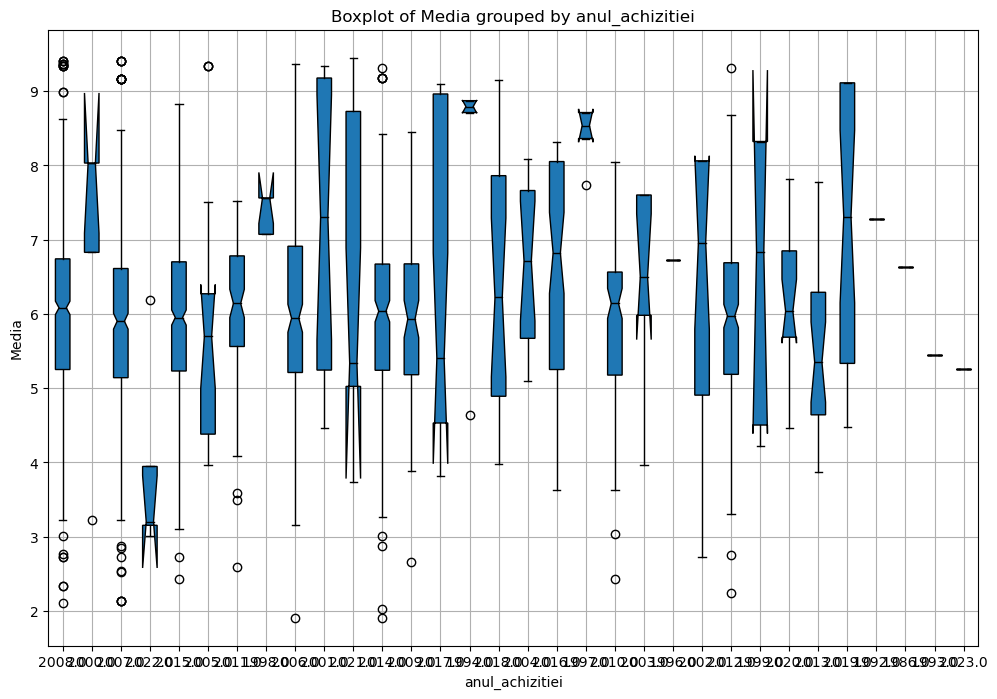

In [34]:
var1 = 'anul_achizitiei'
var2 = 'Media'

plt.figure(figsize=(12, 8))
plt.boxplot([df[var2][df[var1] == value] for value in df[var1].unique()],
            labels=df[var1].unique(),
            notch=True,
            vert=True,
            patch_artist=True,
            medianprops={'color': 'black'})

plt.xlabel(var1)
plt.ylabel(var2)
plt.title(f'Boxplot of {var2} grouped by {var1}')
plt.grid(True)
plt.show()

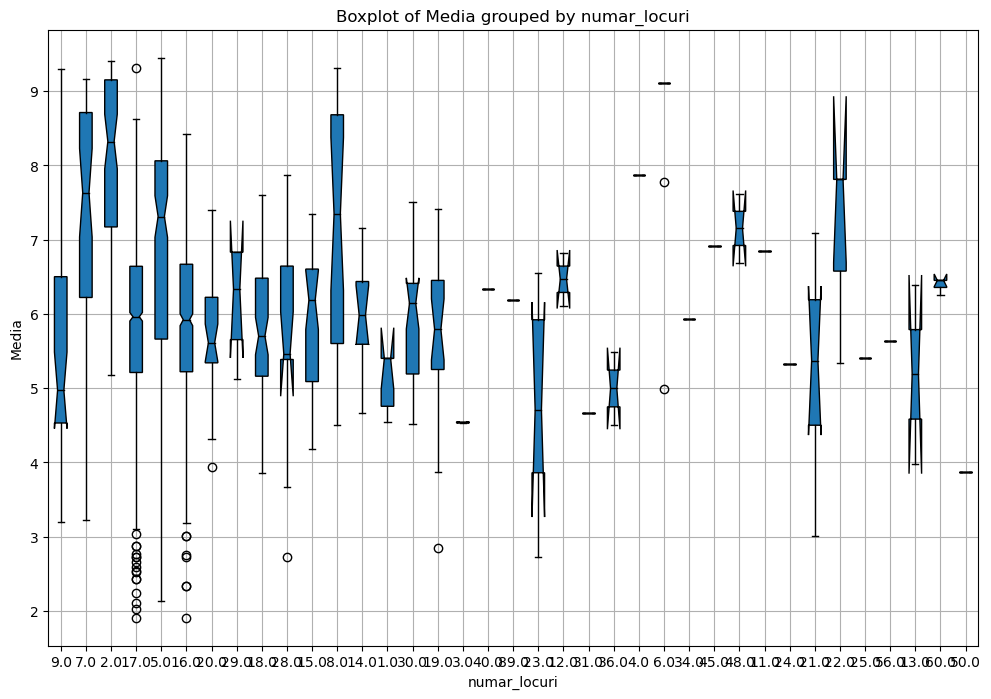

In [35]:
var1 = 'numar_locuri'
var2 = 'Media'

plt.figure(figsize=(12, 8))
plt.boxplot([df[var2][df[var1] == value] for value in df[var1].unique()],
            labels=df[var1].unique(),
            notch=True,
            vert=True,
            patch_artist=True,
            medianprops={'color': 'black'})

plt.xlabel(var1)
plt.ylabel(var2)
plt.title(f'Boxplot of {var2} grouped by {var1}')
plt.grid(True)
plt.show()

### KERNEL DENSITY PLOT

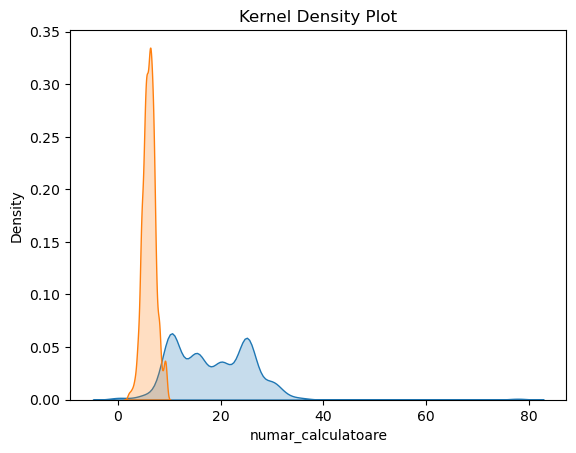

In [36]:
sns.kdeplot(df['numar_calculatoare'], fill=True, label='Numar de calculatoare')
sns.kdeplot(df['Media'], fill=True, label='Performanta')

plt.title('Kernel Density Plot')

plt.ylabel('Density')
plt.show()

In [37]:
# Dacă buclele de densitate se intersectează, acest lucru indică o suprapunere între distribuția de probabilitate a celor două variabile. Acest lucru poate sugera o asociere între variabilele respective. 

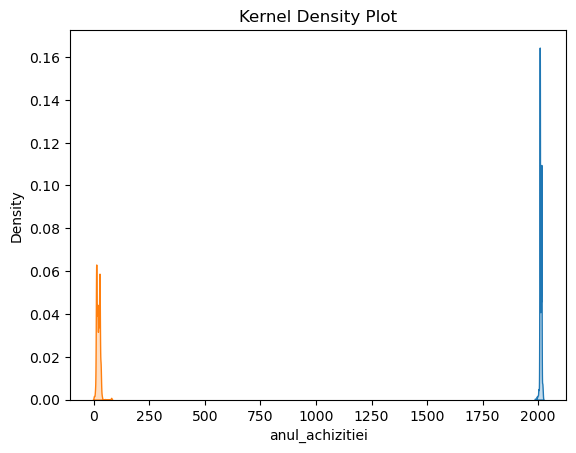

In [38]:
sns.kdeplot(df['anul_achizitiei'], fill=True, label='Anul de achizitie a calculatoarelor')
sns.kdeplot(df['numar_calculatoare'], fill=True, label='numar de calculatoare')

plt.title('Kernel Density Plot')

plt.ylabel('Density')
plt.show()

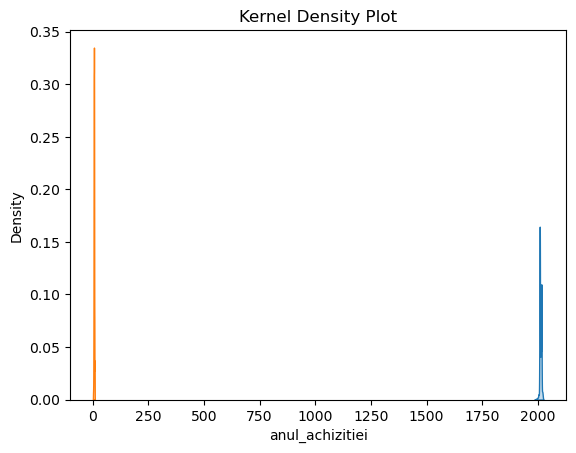

In [39]:
sns.kdeplot(df['anul_achizitiei'], fill=True, label='Anul de achizitie a calculatoarelor')
sns.kdeplot(df['Media'], fill=True, label='Performanta')

plt.title('Kernel Density Plot')

plt.ylabel('Density')
plt.show()

### TABEL DE CONTINGENTA

In [40]:
contingency_table = pd.crosstab(df['numar_calculatoare'],df['Media'])

print("Tabel de Contingenta:")
print(contingency_table)

Tabel de Contingenta:
Media               1.91  2.03  2.11  2.13  2.24  2.33  2.43  2.52  2.54  \
numar_calculatoare                                                         
0.0                    0     0     0     0     0     0     0     0     0   
1.0                    0     0     0     0     0     0     0     0     0   
2.0                    0     0     0     0     0     0     0     0     0   
3.0                    0     0     0     0     0     0     0     0     0   
4.0                    0     0     0     0     0     0     0     0     0   
5.0                    0     0     0     0     0     0     0     0     0   
6.0                    0     0     0     0     0     0     0     0     0   
7.0                    0     0     0     0     0     0     0     0     0   
8.0                    0     0     0     0     0     0     0     0     0   
9.0                    0     0     0     0     0     0     0     0     0   
10.0                   0     0     1     1     0     0     2     0

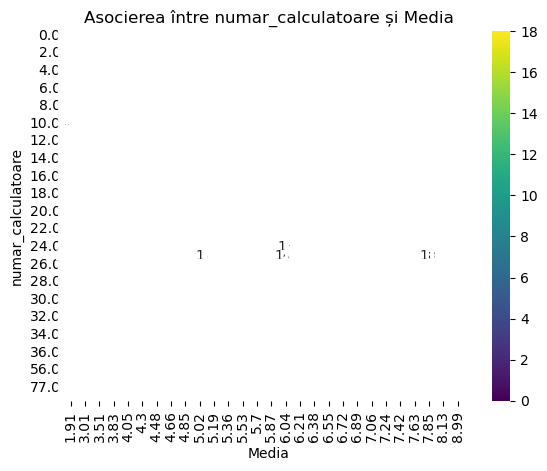

In [41]:
sns.heatmap(contingency_table, annot=True, fmt=".2f", cmap="viridis", linewidths=.5)
plt.title('Asocierea între numar_calculatoare și Media')
plt.xlabel('Media')
plt.ylabel('numar_calculatoare')
plt.show()

### Violin Plot

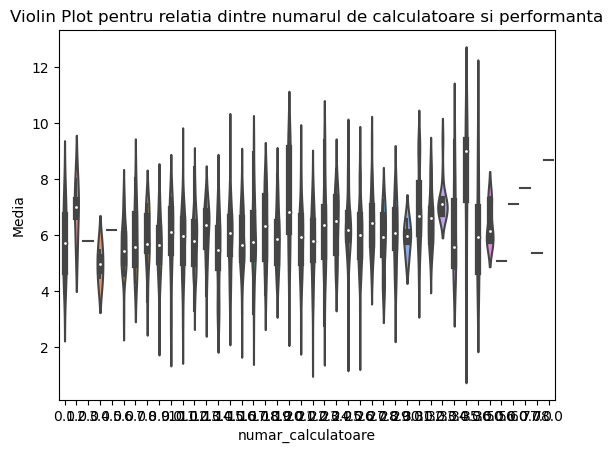

In [42]:
sns.violinplot(x=df['numar_calculatoare'], y=df['Media'])
plt.title('Violin Plot pentru relatia dintre numarul de calculatoare si performanta')
plt.xlabel('numar_calculatoare')
plt.ylabel('Media')
plt.show()

### Ipotezele

Ipoteza Nulă (H0): Nu există nicio relație semnificativă între variabilele independente (numar_calculatoare, numar_locuri, anul_achizitiei) și variabila dependentă (media).

Ipoteza Alternativă (H1): Există o relație semnificativă între cel puțin o variabila independenta și variabila dependentă.

Interpretare: In urma analizei exploratoare, acceptam ipoteza nula. Nu exista o relatie semnificativa intre variabilele independente (numar_calculatoare, numar_locuri, anul_achizitiei) si variabila dependentă (media). 

Asadar, performanta elevilor la Evaluarea Nationala este intr-o mica masura explicata de variabilele independente. 
Performantele lor nu sunt influentate semnificativ de mediul scolar(caracteristicile fizice ale sălilor de clasă) sau transportul la scoala.